This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

Set Seed

In [117]:
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras

random.seed(10)
np.random.seed(10)
tf.random.set_seed(10)


**Loading the IMDB dataset**

In [118]:
keras.utils.set_random_seed(10)

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [119]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [120]:
train_labels[0]

1

In [121]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [122]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [123]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [124]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [125]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [126]:
from tensorflow.keras import layers

keras.utils.set_random_seed(10)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [127]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [128]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [129]:
keras.utils.set_random_seed(10)

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6520 - loss: 0.6251 - val_accuracy: 0.8026 - val_loss: 0.4548
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8700 - loss: 0.3709 - val_accuracy: 0.8622 - val_loss: 0.3468
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9089 - loss: 0.2698 - val_accuracy: 0.8763 - val_loss: 0.3059
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9279 - loss: 0.2139 - val_accuracy: 0.8822 - val_loss: 0.2914
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9426 - loss: 0.1756 - val_accuracy: 0.8840 - val_loss: 0.2832
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9478 - loss: 0.1504 - val_accuracy: 0.8826 - val_loss: 0.2874
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9597 - loss: 0.1251 - val_accuracy: 0.8791 - val_loss: 0.3104
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9625 - loss: 0.1114 - val_accuracy: 0.8785 - val_loss

In [130]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

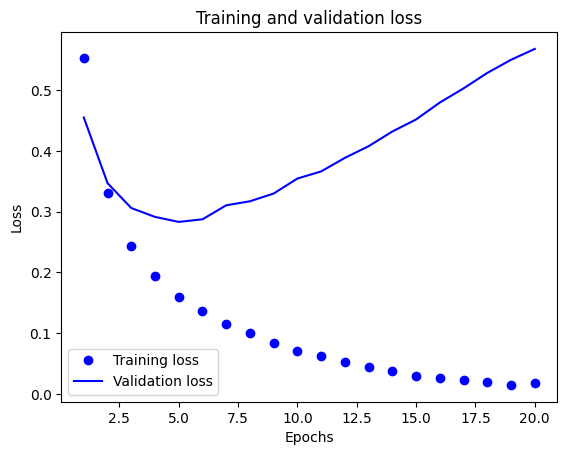

In [131]:
keras.utils.set_random_seed(10)

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

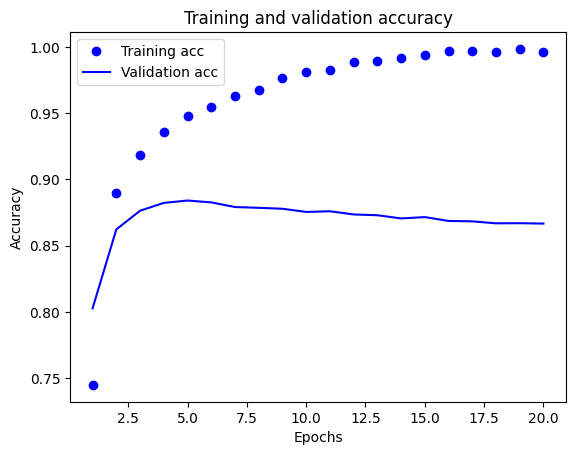

In [132]:
keras.utils.set_random_seed(10)

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [133]:
keras.utils.set_random_seed(10)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5, batch_size=512)
results_2hl_d16 = model.evaluate(x_test, y_test)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7268 - loss: 0.5462
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9012 - loss: 0.2805
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9225 - loss: 0.2130
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9324 - loss: 0.1802
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9432 - loss: 0.1580
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8750 - loss: 0.3157


In [151]:
results_2hl_d16

[0.3156028091907501, 0.8770800232887268]

### Using a trained model to generate predictions on new data

In [135]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step


array([[0.12186337],
       [0.99962837],
       [0.44029793],
       ...,
       [0.09406891],
       [0.03295566],
       [0.56678116]], dtype=float32)

### Question 1: You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.

Creating a one hidden layer model 

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6820 - loss: 0.5976 - val_accuracy: 0.8272 - val_loss: 0.4342
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8782 - loss: 0.3708 - val_accuracy: 0.8632 - val_loss: 0.3559
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9046 - loss: 0.2903 - val_accuracy: 0.8761 - val_loss: 0.3164
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9211 - loss: 0.2434 - val_accuracy: 0.8827 - val_loss: 0.2960
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9322 - loss: 0.2115 - val_accuracy: 0.8841 - val_loss: 0.2874
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9410 - loss: 0.1878 - val_accuracy: 0.8839 - val_loss: 0.2850
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9467 - loss: 0.1690 - val_accuracy: 0.8823 - val_loss: 0.2860
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9519 - loss: 0.1532 - val_accuracy: 0.8819 - val_los

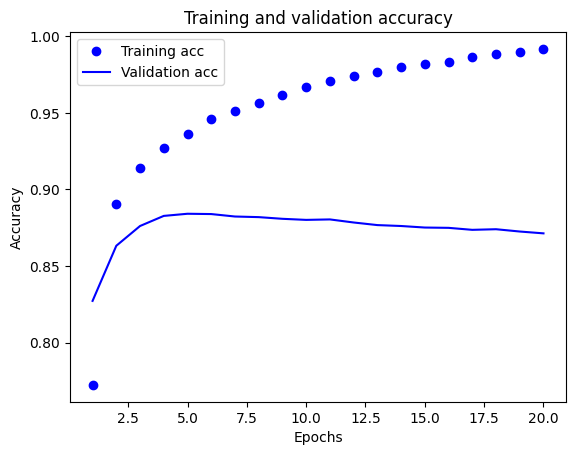

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7522 - loss: 0.5455
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8963 - loss: 0.3071
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9161 - loss: 0.2414
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9267 - loss: 0.2075
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9347 - loss: 0.1855
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - accuracy: 0.8837 - loss: 0.2876


In [136]:
keras.utils.set_random_seed(10)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

history_dict = history.history
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5, batch_size=512)

results_1hl = model.evaluate(x_test, y_test)


Creating a three hidden layers model

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6481 - loss: 0.6294 - val_accuracy: 0.7993 - val_loss: 0.4714
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8693 - loss: 0.3787 - val_accuracy: 0.8641 - val_loss: 0.3435
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9039 - loss: 0.2711 - val_accuracy: 0.8754 - val_loss: 0.3074
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9293 - loss: 0.2101 - val_accuracy: 0.8840 - val_loss: 0.2852
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9354 - loss: 0.1769 - val_accuracy: 0.8874 - val_loss: 0.2824
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9470 - loss: 0.1522 - val_accuracy: 0.8799 - val_loss: 0.3007
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9593 - loss: 0.1213 - val_accuracy: 0.8794 - val_loss: 0.3142
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9667 - loss: 0.1060 - val_accuracy: 0.8800 - val_loss

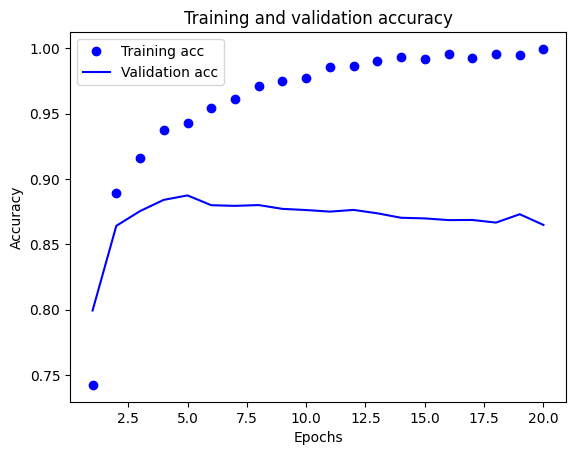

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7159 - loss: 0.5767
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8984 - loss: 0.2912
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9181 - loss: 0.2196
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9325 - loss: 0.1807
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9401 - loss: 0.1631
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 860us/step - accuracy: 0.8733 - loss: 0.3230


In [137]:
keras.utils.set_random_seed(10)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))


history_dict = history.history
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=5, batch_size=512)
results_3hl = model.evaluate(x_test, y_test)

Results from one, two, and three hidden layers

In [138]:
print(f"Results with one hidden layers: {results_1hl}\nResults with two hidden layers: {results_2hl_d16}\nResults with three hidden layers: {results_3hl}")

Results with one hidden layers: [0.28728342056274414, 0.8839600086212158]
Results with two hidden layers: [0.3156028091907501, 0.8770800232887268]
Results with three hidden layers: [0.32254111766815186, 0.8758400082588196]


### Question 2: Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.

32 Units

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6910 - loss: 0.5883 - val_accuracy: 0.8165 - val_loss: 0.4312
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8774 - loss: 0.3532 - val_accuracy: 0.8608 - val_loss: 0.3482
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9049 - loss: 0.2757 - val_accuracy: 0.8772 - val_loss: 0.3087
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9232 - loss: 0.2304 - val_accuracy: 0.8825 - val_loss: 0.2913
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9333 - loss: 0.2001 - val_accuracy: 0.8833 - val_loss: 0.2863
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9422 - loss: 0.1773 - val_accuracy: 0.8820 - val_loss: 0.2894
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9475 - loss: 0.1596 - val_accuracy: 0.8833 - val_loss: 0.2863
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9520 - loss: 0.1449 - val_accuracy: 0.8837 - val_lo

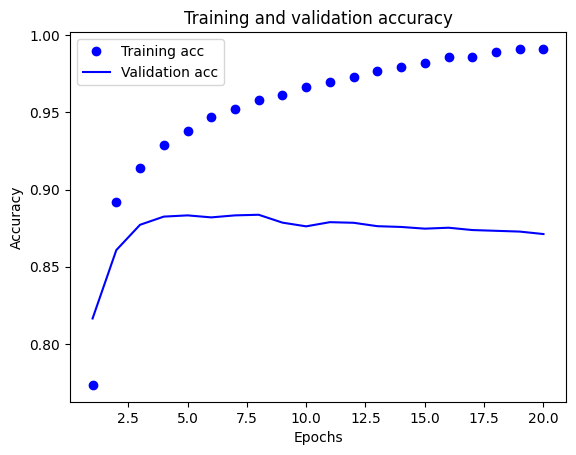

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7390 - loss: 0.5338
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8989 - loss: 0.2877
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9163 - loss: 0.2297
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9273 - loss: 0.1998
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8861 - loss: 0.2828


In [152]:
keras.utils.set_random_seed(10)

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results_d32 = model.evaluate(x_test, y_test)

history_dict = history.history
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results_d32 = model.evaluate(x_test, y_test)


64 Units

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6669 - loss: 0.5938 - val_accuracy: 0.7950 - val_loss: 0.4437
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8743 - loss: 0.3435 - val_accuracy: 0.8684 - val_loss: 0.3314
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9038 - loss: 0.2664 - val_accuracy: 0.8771 - val_loss: 0.3061
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9244 - loss: 0.2206 - val_accuracy: 0.8807 - val_loss: 0.2935
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9282 - loss: 0.1974 - val_accuracy: 0.8797 - val_loss: 0.2972
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9376 - loss: 0.1760 - val_accuracy: 0.8824 - val_loss: 0.2884
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9463 - loss: 0.1551 - val_accuracy: 0.8785 - val_loss: 0.3024
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9533 - loss: 0.1412 - val_accuracy: 0.8811 - v

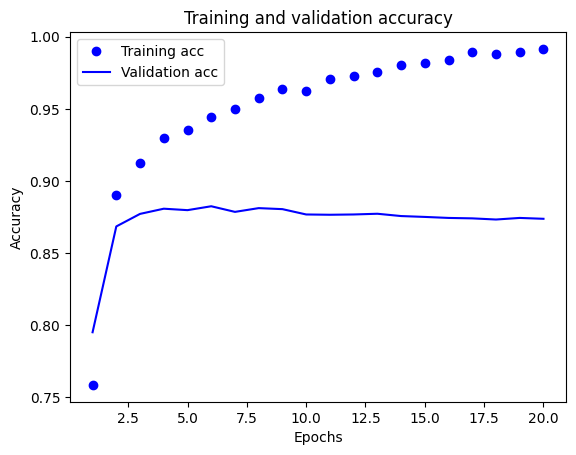

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7360 - loss: 0.5337
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8935 - loss: 0.2850
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9175 - loss: 0.2271
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9245 - loss: 0.2021
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8828 - loss: 0.2869


In [154]:
keras.utils.set_random_seed(10)

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

history_dict = history.history
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results_d64 = model.evaluate(x_test, y_test)

Results

In [155]:
print(f"Results with 16 hidden units: {results_2hl_d16}\nResults with 32 hidden units: {results_d32}\nResults with 64 hidden units: {results_d64}")

Results with 16 hidden units: [0.3156028091907501, 0.8770800232887268]
Results with 32 hidden units: [0.28019919991493225, 0.887440025806427]
Results with 64 hidden units: [0.2841067910194397, 0.8854399919509888]


### Question 3: Try using the mse loss function instead of binary_crossentropy.

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6846 - loss: 0.2079 - val_accuracy: 0.7926 - val_loss: 0.1505
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8676 - loss: 0.1183 - val_accuracy: 0.8535 - val_loss: 0.1152
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8965 - loss: 0.0919 - val_accuracy: 0.8639 - val_loss: 0.1054
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9129 - loss: 0.0775 - val_accuracy: 0.8878 - val_loss: 0.0889
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9218 - loss: 0.0682 - val_accuracy: 0.8787 - val_loss: 0.0912
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9334 - loss: 0.0613 - val_accuracy: 0.8786 - val_loss: 0.0896
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9391 - loss: 0.0570 - val_accuracy: 0.8859 - val_loss: 0.0846
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9433 - loss: 0.0529 - val_accuracy: 0.8762 - val_lo

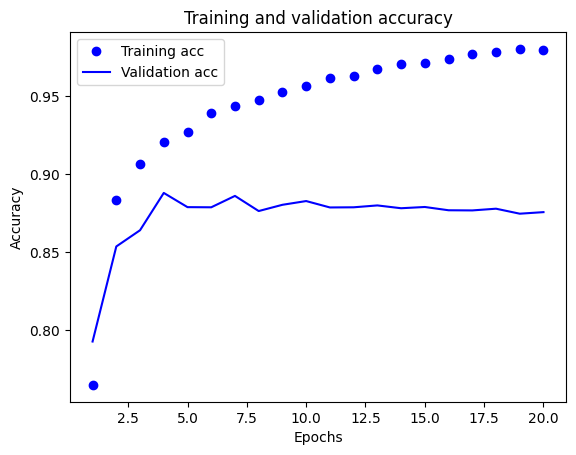

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7345 - loss: 0.1857
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8895 - loss: 0.0946
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9086 - loss: 0.0762
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9229 - loss: 0.0660
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8857 - loss: 0.0867


In [157]:
keras.utils.set_random_seed(10)

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="mse",  # MSE instead of binary_crossentropy
              metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

history_dict = history.history
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="mse",  # MSE instead of binary_crossentropy
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results_mse = model.evaluate(x_test, y_test)

Results

In [158]:
print(f"Results with binary crossentropy loss: {results_d32}\nResults with MSE loss: {results_mse}")

Results with binary crossentropy loss: [0.28019919991493225, 0.887440025806427]
Results with MSE loss: [0.08639255911111832, 0.885919988155365]


### Question 4: Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6993 - loss: 0.5760 - val_accuracy: 0.8164 - val_loss: 0.4259
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8821 - loss: 0.3423 - val_accuracy: 0.8601 - val_loss: 0.3433
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9087 - loss: 0.2655 - val_accuracy: 0.8766 - val_loss: 0.3039
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9256 - loss: 0.2206 - val_accuracy: 0.8830 - val_loss: 0.2879
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9365 - loss: 0.1894 - val_accuracy: 0.8810 - val_loss: 0.2861
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9456 - loss: 0.1659 - val_accuracy: 0.8826 - val_loss: 0.2855
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9505 - loss: 0.1479 - val_accuracy: 0.8841 - val_loss: 0.2877
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9560 - loss: 0.1304 - val_accuracy: 0.8804 - val_loss

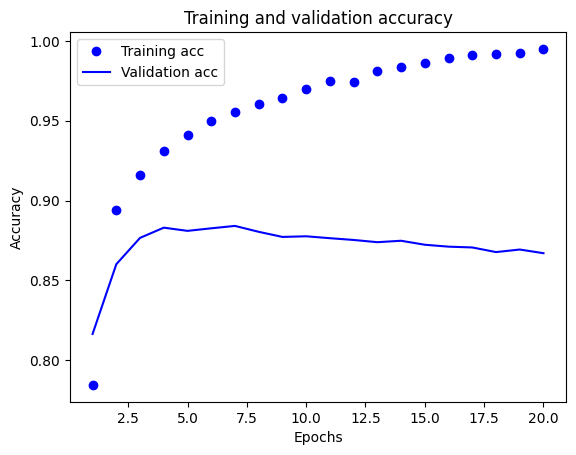

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7487 - loss: 0.5309
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9020 - loss: 0.2802
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9190 - loss: 0.2208
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9298 - loss: 0.1897
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step - accuracy: 0.8826 - loss: 0.2890


In [159]:
keras.utils.set_random_seed(10)

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

history_dict = history.history
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_tahn = model.evaluate(x_test, y_test)

Results

In [160]:
print(f"Results with relu: {results_d32}\nResults with tahn activation: {results_tahn}")

Results with relu: [0.28019919991493225, 0.887440025806427]
Results with tahn activation: [0.28546398878097534, 0.8854399919509888]


### Question 5: Use any technique we studied in class, and these include regularization, dropout, etc., to get your model to perform better on validation.

L2 Regularization

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6903 - loss: 0.6497 - val_accuracy: 0.8133 - val_loss: 0.4898
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8752 - loss: 0.4138 - val_accuracy: 0.8577 - val_loss: 0.4089
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9015 - loss: 0.3411 - val_accuracy: 0.8721 - val_loss: 0.3734
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9144 - loss: 0.3025 - val_accuracy: 0.8786 - val_loss: 0.3570
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9241 - loss: 0.2791 - val_accuracy: 0.8793 - val_loss: 0.3517
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9299 - loss: 0.2633 - val_accuracy: 0.8805 - val_loss: 0.3488
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9350 - loss: 0.2515 - val_accuracy: 0.8772 - val_loss: 0.3568
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9373 - loss: 0.2443 - val_accuracy: 0.8831 - val_los

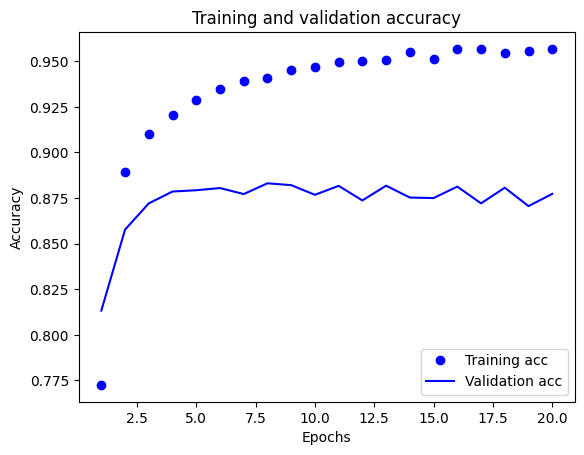

Epoch 1/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7367 - loss: 0.5960
Epoch 2/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8955 - loss: 0.3490
Epoch 3/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9085 - loss: 0.2987
Epoch 4/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9162 - loss: 0.2776
Epoch 5/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9228 - loss: 0.2634
Epoch 6/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9240 - loss: 0.2572
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8816 - loss: 0.3420


In [161]:
from tensorflow.keras import regularizers
keras.utils.set_random_seed(10)

model = keras.Sequential([
    layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

history_dict = history.history
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model = keras.Sequential([
    layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=6, batch_size=512)
results_l2r = model.evaluate(x_test, y_test)

Dropout

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6497 - loss: 0.6170 - val_accuracy: 0.7992 - val_loss: 0.4555
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8462 - loss: 0.4053 - val_accuracy: 0.8666 - val_loss: 0.3529
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8855 - loss: 0.3206 - val_accuracy: 0.8727 - val_loss: 0.3217
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8978 - loss: 0.2801 - val_accuracy: 0.8817 - val_loss: 0.2986
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9185 - loss: 0.2432 - val_accuracy: 0.8822 - val_loss: 0.2934
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9233 - loss: 0.2169 - val_accuracy: 0.8852 - val_loss: 0.2851
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9350 - loss: 0.1957 - val_accuracy: 0.8854 - val_loss: 0.2865
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9425 - loss: 0.1755 - val_accuracy: 0.8810 - val_loss

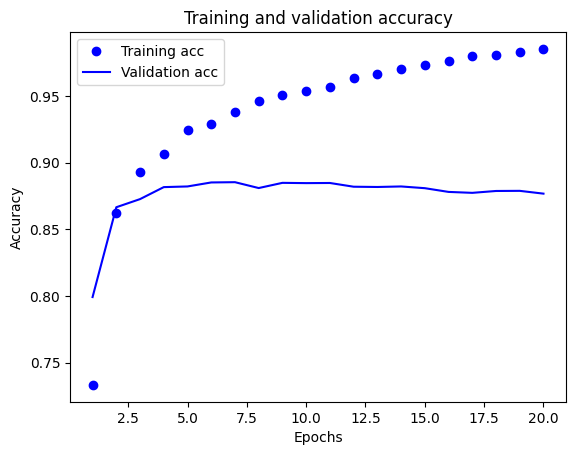

Epoch 1/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7153 - loss: 0.5620
Epoch 2/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8811 - loss: 0.3301
Epoch 3/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9048 - loss: 0.2673
Epoch 4/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9157 - loss: 0.2292
Epoch 5/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9248 - loss: 0.2072
Epoch 6/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9336 - loss: 0.1871
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - accuracy: 0.8826 - loss: 0.2846


In [163]:
keras.utils.set_random_seed(10)

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

history_dict = history.history
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=6, batch_size=512)
results_dropout = model.evaluate(x_test, y_test)

Results

In [165]:
print(f"Benchmark {results_d32}\nResults with L2 regularization: {results_l2r}\nTest Accuracy with Dropout: {results_dropout}")

Benchmark [0.28019919991493225, 0.887440025806427]
Results with L2 regularization: [0.3385487496852875, 0.8840000033378601]
Test Accuracy with Dropout: [0.28452134132385254, 0.8852800130844116]


### Final Results

In [166]:
# Create a dictionary to store model names and their accuracies
accuracy_dict = {
    'One hidden layer': results_1hl[1],
    'Two hidden layers (16 units)': results_2hl_d16[1],
    'Three hidden layers': results_3hl[1],
    '16 hidden units': results_2hl_d16[1],
    '32 hidden units': results_d32[1],
    '64 hidden units': results_d64[1],
    'Binary crossentropy': results_2hl_d16[1],
    'MSE loss': results_mse[1],
    'Relu activation': results_2hl_d16[1],
    'Tanh activation': results_tahn[1],
    'L2 regularization': results_l2r[1],
    'Dropout': results_dropout[1]
}

# Find the model with the highest accuracy
best_model = max(accuracy_dict, key=accuracy_dict.get)
best_accuracy = accuracy_dict[best_model]

print(f"The model with the highest accuracy is '{best_model}' with an accuracy of {best_accuracy:.4f}")


The model with the highest accuracy is '32 hidden units' with an accuracy of 0.8874
